# Pràctica 1:

Nom dels alumnes del grup: David Vilajosana Garriga i Pau Segura Baños

> Recordeu que, tot i que la pràctica es fa en parelles, els dos membres del grup han de lliurar al campus virtual aquest notebook.

# Anàlisi exploratòria de dades (EDA) & ús d'eines avançades de Python

L'**anàlisi exploratòria de dades** (EDA, per les seves sigles en anglès, *Exploratory Data Analysis*) és un procés crític en la ciència de les dades que implica **explorar, resumir i visualitzar** les dades per a entendre les seves característiques principals. L'objectiu principal de l'EDA és revelar patrons, tendències i anomalies a partir de les dades, sense fer suposicions massa específiques o construir models massa complexes.

Aquí teniu alguns dels elements més importants de l'anàlisi exploratòria de dades:

+ **Visualització de dades**: A través de gràfics i gràfiques, es representen les dades per a veure distribucions, tendències i relacions. Això pot incloure histogrames, gràfics de barres, diagrames de dispersió, gràfics de caixa, etc.

+ **Estadístiques descriptives**: Es calculen estadístiques com la mitjana, la mediana, la desviació estàndard i altres mesures resum per a descriure les característiques bàsiques de les variables.

+ **Detecció d'anomalies**: Es busca identificar valors atípics o anòmals que puguin indicar errors o situacions especials en les dades.

+ **Imputació de dades faltants**: Si les dades tenen buits o valors faltants, es pot decidir com omplir aquests buits de manera adequada.

+ **Exploració de relacions**: Es busquen correlacions i relacions entre les diferents variables de les dades per a identificar connexions i dependencies.

+ **Agrupació de dades**: Es divideixen les dades en subconjunts basats en certes característiques per a analitzar-les més detingudament.

+ **Transformació de dades**: Es poden aplicar transformacions a les dades per a fer-les més adequades per a anàlisi posterior, com l'estandardització o la normalització.

* **Selecció de característiques**: Si es treballa amb un conjunt de dades amb moltes variables, es pot realitzar una selecció de característiques per a reduir la complexitat i millorar l'eficiència de l'anàlisi.

Python ofereix una àmplia gamma d'eines i biblioteques per a realitzar l'anàlisi exploratòria de dades (EDA). Algunes de les biblioteques més populars i útils són les següents:

+ **NumPy**: NumPy és una biblioteca fonamental per a la computació científica en Python. Proporciona funcionalitats per a treballar amb matrius i vectors, la qual cosa és essencial per a l'anàlisi de dades.

+ **Pandas**: Pandas és una biblioteca molt popular per a l'anàlisi de dades que ofereix estructures de dades com DataFrame i Series, que faciliten la manipulació i anàlisi de dades tabulars. Podeu utilitzar Pandas per a carregar, netejar i explorar les dades.

+ **Matplotlib**: Matplotlib és una biblioteca per a la visualització de dades que us permet crear una àmplia gamma de gràfics i gràfiques personalitzades. És ideal per a crear histogrames, diagrames de dispersió, gràfics de barres i moltes altres representacions gràfiques.

+ **Scipy**: SciPy és una biblioteca que amplia les funcionalitats de NumPy i proporciona eines addicionals per a l'anàlisi científic, inclosos estadístics i mètodes d'optimització.

+ **Scikit-learn**: Si esteu interessats en l'aprenentatge automàtic, Scikit-learn és una biblioteca essencial que ofereix eines per a la classificació, regressió, agrupació i altres tasques d'aprenentatge automàtic. També conté eines per a la selecció de característiques.

+ **Seaborn**: Seaborn és una biblioteca de visualització de dades basada en Matplotlib que simplifica la creació de gràfics estadístics atractius i informatius. És especialment útil per a la visualització de relacions i tendències en les dades.

## 0. Objectiu de la pràctica

L'**objectiu d'aquesta pràctica** és aprendre com fer una exploració sobre un conjunt de dades real, que al final ens permeti obtenir la resposta a diverses preguntes.

En aquesta pràctica explorarem les dades dels trajectes dels **taxis grocs de la ciutat de Nova York** durant varios anys.

En finalitzar aquesta pràctica, haureu de ser capaços de respondre la pregunta següent de forma detallada:

- **Com va afectar la pandèmia de la Covid l'ús dels taxis a Nova York?**

Pere respondre aquesta pregunta tant genèrica, ho descomposarem en preguntes més concretes:

- Quina distribució d'encàrrecs segueixen els taxis i quina distància / durada tenen?
- Quines són les zones on m'és / menys taxis s'agafen?
- Quins horaris són els més usuals?
- Quins dies de la setmana i del mes s'utilitzen més?
- Etc.

### Instal·lació i importació de les llibreries necessàries

A més a més de les llibreries comentades, farem servir aquests mòduls de Python:

+ **PyArrow**: PyArrow és una biblioteca de Python que es fa servir per a l'intercanvi eficient de dades entre Python i altres llenguatges de programació, especialment C++ i Java. Aquesta biblioteca es desenvolupa com a part del projecte Apache Arrow, que és un projecte de codi obert dissenyat per a millorar el rendiment i la interoperabilitat de l'analítica de dades i les tecnologies relacionades. PyArrow permet la creació i la manipulació eficient de dades en forma de taules i columnes. PyArrow ofereix suport per a l'estructura de dades coneguda com a "Table", que és similar a una taula o un quadern de dades en altres llenguatges. Aquesta estructura de dades facilita l'organització i la manipulació de dades tabulars.
+ **pyshp** és una biblioteca de Python que es fa servir per a llegir i escriure arxius en el format de fitxers de forma (shapefiles). El format de fitxers de forma és un format estàndard en geoinformàtica i geodèsia per a emmagatzemar i intercanviar dades geoespacials, com ara punts, línies i polígons, juntament amb les seves propietats associades.
+ **shapely** és una biblioteca de Python que es fa servir per a realitzar operacions geomètriques i anàlisi espacial amb objectes geoespacials. Aquesta biblioteca és especialment útil per a treballar amb geometria plana, com ara punts, línies i polígons, i permet realitzar una àmplia gamma d'operacions, com ara interseccions, unions, àrees, longituds i moltes altres.
+ **descartes** és una biblioteca de tercers que es fa servir per a la visualització de gràfics geoespacials.

In [1]:
%%capture
! pip install pyarrow
! pip install pyshp==2.1.3
! pip install shapely==1.7.1
! pip install pandas==1.5.3
! pip install numpy==1.22
! pip install descartes==1.1.0

In [2]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import os
from tqdm.notebook import tqdm
import pyarrow.parquet as pq

In [3]:
import shapefile
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Descàrrega de dades

In [4]:
# Variables globals: els anys que estudiarem
YEARS = [2019, 2020, 2021]

In [5]:
# Descàrrega de les dades: Trip Record Data
# https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

for year in tqdm(YEARS):
    if not os.path.exists(f'data/{year}'):
        os.makedirs(f'data/{year}', exist_ok=True)
        for month in tqdm(range(1, 13)):
            urllib.request.urlretrieve(f'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month:02d}.parquet', f'data/{year}/{month:02d}.parquet')

  0%|          | 0/3 [00:00<?, ?it/s]

## 2. Neteja de dades

Per tal de tenir unes dades netes i útils, eliminarem totes aquells trajectes (files del conjunt de dades)  que continguin informació *corrupte*. Per exemple, com a mínim cal verificar que no es dóna cap d'aquests casos:

- Presència de *missing data* (camps/columnes de les dades sense valor).
- L'hora de recollida és posterior a la finalització del trajecte.
- Les dades s'importen per mes i any. Són coherents els valors que contenen les dades?
- Hi ha viatges amb un nombre absurd de passatgers?
- Hi ha viatges massa llargs o massa curts?
- Hi ha pagaments negatius?
- Etc.

A més a més, podem considerar aspectes concrets d'aquestes dades:

+ Hi pot haver viatges impossibles segons la normativa:
    + [Més viatgers que els permesos](https://www1.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page) o [velocitats il·legals](https://www.speed-limits.com/newyork).
    + [Limit de persones permeses a un yellow taxicab](https://drive.google.com/file/d/1eiV7wdm7WrkRlM9bmekCRM6GY3Yq6GI2/view?usp=sharing)

De totes les columnes que tenen les dades, només cal fer servir les següents per contestar les preguntes:

- *tpep_pickup_datetime*: The date and time when the meter was engaged.
- *tpep_dropoff_datetime*: The date and time when the meter was disengaged.
- *Passenger_count*: The number of passengers in the vehicle.
- *Trip_distance*: The elapsed trip distance in miles reported by the taximeter.
- *PULocationID*: TLC Taxi Zone in which the taximeter was engaged
- *DOLocationID*: TLC Taxi Zone in which the taximeter was disengaged
- *Payment_type*: A numeric code signifying how the passenger paid for the trip.
    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip
- *Fare_amount*: The time-and-distance fare calculated by the meter.
- *Total_amount*: The total amount charged to passengers.

In [6]:
# carreguem les dades a un dataframe de pandas
# Per agilitzar els càlculs i reduir el temps de càlcul durant el desenvolupament,
# podeu treballarem amb una mostra uniforme de les dades (1 fila de cada 1000).

def load_table(year, month, sampling = 1000):
    """
    Funció que llegeix les dades descarregades i les converteix a un DataFrame
    """
    data = pq.read_table(f'data/{year}/{str(month).zfill(2)}.parquet').to_pandas()
    required_data = ['tpep_pickup_datetime',
                 'tpep_dropoff_datetime',
                 'passenger_count',
                 'trip_distance',
                 'PULocationID',
                 'DOLocationID',
                 'payment_type',
                 'fare_amount',
                 'total_amount']
    return data[required_data][::sampling]

# explorem una mica les dades
test = load_table(2019, 1)
test.shape

(7697, 9)

In [7]:
test.tail(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
7687000,2019-01-22 13:33:00,2019-01-22 14:08:00,NaN,8.20,179,4,0,35.95,39.5
7688000,2019-01-23 10:32:30,2019-01-23 11:23:12,NaN,13.25,218,49,0,65.05,68.1
7689000,2019-01-24 07:50:00,2019-01-24 09:24:00,NaN,14.81,185,114,0,50.69,60.0
7690000,2019-01-25 06:36:00,2019-01-25 07:20:00,NaN,16.97,215,87,0,74.19,83.5
7691000,2019-01-25 18:07:00,2019-01-25 18:46:00,NaN,6.58,52,71,0,32.45,36.0
7692000,2019-01-27 11:46:00,2019-01-27 12:20:00,NaN,11.27,89,90,0,39.89,49.2
7693000,2019-01-28 13:22:00,2019-01-28 13:49:00,NaN,10.40,55,228,0,45.65,49.2
7694000,2019-01-29 11:17:00,2019-01-29 11:54:00,NaN,6.63,45,239,0,35.95,39.5
7695000,2019-01-30 08:35:00,2019-01-30 08:55:00,NaN,6.98,137,42,0,35.95,39.5
7696000,2019-01-31 09:00:00,2019-01-31 09:45:00,NaN,4.11,162,231,0,35.95,39.5


###  Exercici A

+ Un cop llegides les dades a una taula de Pandas, implementa una funció que faci el procés de neteja que consideris necessari. Per determinar què és necessari, explora els valors que apareixen a cada columna del dataframe de Pandas i decideix què cal fer.

> *Nota: Les columnes `Datatime` són un subtipus de dades de Pandas anomenades `datetime`.  Busca com tractar de forma eficient aquest tipus de dades en Pandas.*

In [8]:
def clean_data(data, year, month):
    """
    Funció que neteja (una mostra de) les dades per un mes donat.
    """
    # eliminem les files amb elements buits
    data = data.dropna()

    #Eliminem les files que continguin passatgers nulls o negatius o majors a 6
    data = data[(data['passenger_count'] >= 1) & (data['passenger_count'] <= 6)]

    #Eliminem les files on la data de "dropoff" es abans de la data del "pickup" o una durada de viatge de més de 8h
    data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')
    data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], errors='coerce')
    data = data[data['tpep_pickup_datetime'] < data['tpep_dropoff_datetime']]
    data['time_traveling_hours'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
    data['time_traveling_hours'] = data['time_traveling_hours'].dt.total_seconds() / 3600

    data = data[data['time_traveling_hours'] < 8]

    #Eliminem les files amb pagament negatiu
    data = data[(data['total_amount'] > 0) & (data['fare_amount'] > 0) & (data['total_amount'] > data ['fare_amount'])]

    #Eliminem les files amb ditancia negativa o valors molt grans (300 millas)
    data = data[(data['trip_distance'] > 0) & (data['trip_distance'] < 300)]

    #Eliminem les files que continguin dades de un altre any o mes:
    data['year'] = data['tpep_pickup_datetime'].dt.year
    data['month'] = data['tpep_pickup_datetime'].dt.month
    data = data[(data['year'] == year) & (data['month'] == month)]
    return data


In [9]:
test = clean_data(test, 2019, 1)
test.tail(10000)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,time_traveling_hours,year,month
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,151,239,1,7.0,9.95,0.111111,2019,1
1000,2019-01-01 00:53:09,2019-01-01 01:01:16,1.0,1.91,148,137,2,8.5,9.80,0.135278,2019,1
2000,2019-01-01 00:50:22,2019-01-01 01:19:44,2.0,7.70,264,264,1,26.0,31.30,0.489444,2019,1
3000,2019-01-01 00:54:46,2019-01-01 01:03:13,1.0,1.40,249,164,1,7.5,11.40,0.140833,2019,1
4000,2019-01-01 00:09:29,2019-01-01 00:12:29,2.0,0.67,162,137,2,4.0,5.30,0.050000,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7663000,2019-01-31 23:11:50,2019-01-31 23:19:35,2.0,1.88,237,48,2,8.0,9.30,0.129167,2019,1
7664000,2019-01-31 23:04:22,2019-01-31 23:12:26,1.0,1.19,161,161,1,7.5,10.38,0.134444,2019,1
7665000,2019-01-31 23:19:27,2019-01-31 23:36:55,3.0,5.22,90,74,1,17.5,22.56,0.291111,2019,1
7666000,2019-01-31 23:34:21,2019-02-01 00:25:34,2.0,12.20,48,36,1,41.5,53.45,0.853611,2019,1


###  Exercici B

+ Escriu una funció que transformi la taula original a una nova taula, més adequada per tal de dur a terme l'exploració necessària. Podeu afegir columnes addicionals, precalcular valors, etc.

> Per exemple, podem trasnformar les dades per treballar amb les unitats de kilòmetres i hores per a representar les durades, distàncies i velocitats del trajecte. El motiu és, per una banda, que estem familiaritzades amb el Sistema Internacional d'Unitats (d'aquí el canvi de milles a km). I per altra, optar pels km i no pels metres degut a l'ordre de magnitud de les dades.

In [10]:
def post_processing(data):
    """
    Funció on implementar qualsevol tipus de postprocessament necessari.
    """
    # Converteix la distància de viatge de milles a quilòmetres.
    data['trip_distance_with_km'] = data['trip_distance'] * 1.60934

    # Calcula el temps de viatge en hores, obtenint el transcurs del viatge.
    data['time_traveling_hours'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
    # Després, converteix aquesta durada a hores.
    data['time_traveling_hours'] = data['time_traveling_hours'].dt.total_seconds() / 3600

    # Calcula la velocitat mitjana de viatge en km/h.
    data['traveling_speed'] = data['trip_distance_with_km'] / data['time_traveling_hours']

    return data



In [11]:
post_processing(test)
test.tail(100000)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,time_traveling_hours,year,month,trip_distance_with_km,traveling_speed
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,151,239,1,7.0,9.95,0.111111,2019,1,2.414010,21.726090
1000,2019-01-01 00:53:09,2019-01-01 01:01:16,1.0,1.91,148,137,2,8.5,9.80,0.135278,2019,1,3.073839,22.722427
2000,2019-01-01 00:50:22,2019-01-01 01:19:44,2.0,7.70,264,264,1,26.0,31.30,0.489444,2019,1,12.391918,25.318334
3000,2019-01-01 00:54:46,2019-01-01 01:03:13,1.0,1.40,249,164,1,7.5,11.40,0.140833,2019,1,2.253076,15.998173
4000,2019-01-01 00:09:29,2019-01-01 00:12:29,2.0,0.67,162,137,2,4.0,5.30,0.050000,2019,1,1.078258,21.565156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663000,2019-01-31 23:11:50,2019-01-31 23:19:35,2.0,1.88,237,48,2,8.0,9.30,0.129167,2019,1,3.025559,23.423684
7664000,2019-01-31 23:04:22,2019-01-31 23:12:26,1.0,1.19,161,161,1,7.5,10.38,0.134444,2019,1,1.915115,14.244654
7665000,2019-01-31 23:19:27,2019-01-31 23:36:55,3.0,5.22,90,74,1,17.5,22.56,0.291111,2019,1,8.400755,28.857555
7666000,2019-01-31 23:34:21,2019-02-01 00:25:34,2.0,12.20,48,36,1,41.5,53.45,0.853611,2019,1,19.633948,23.001045


Amb això podem crear un nou dataset (una única taula) que contingui tota la informació dels anys: 2019, 2020, 2021.

In [12]:
df = pd.concat([clean_data(load_table(year, month), year, month)
                for year in tqdm(YEARS)
                for month in tqdm(range(1, 13), leave = False)])
df = post_processing(df)
df.shape

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

(132568, 14)

In [13]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,time_traveling_hours,year,month,trip_distance_with_km,traveling_speed
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,151,239,1,7.0,9.95,0.111111,2019,1,2.414010,21.726090
1000,2019-01-01 00:53:09,2019-01-01 01:01:16,1.0,1.91,148,137,2,8.5,9.80,0.135278,2019,1,3.073839,22.722427
2000,2019-01-01 00:50:22,2019-01-01 01:19:44,2.0,7.70,264,264,1,26.0,31.30,0.489444,2019,1,12.391918,25.318334
3000,2019-01-01 00:54:46,2019-01-01 01:03:13,1.0,1.40,249,164,1,7.5,11.40,0.140833,2019,1,2.253076,15.998173
4000,2019-01-01 00:09:29,2019-01-01 00:12:29,2.0,0.67,162,137,2,4.0,5.30,0.050000,2019,1,1.078258,21.565156


## 3. Visualització de dades anuals

Començarem per obtenir una resposta quantitativa a la pregunta **S'ha incrementat o ha disminuït amb la covid la quantitat de viatges anuals fets amb taxis?**, n'hi ha prou amb crear una figura de barres on es visualitzin la quantitat de viatges per any.

### Exercici C

+ Escriu una funció basada en `matplotlib` que generi aquesta gràfica.

In [14]:
def bar_plot(df, column, xlabel, ylabel, title):
    """
    Funció que crea un diagrama de barres a partir d'un dataframe i
    una columna que conté la informació.
    """

    # Compta les aparicions úniques de cada valor a la columna especificada.
    count_travels = df[column].value_counts()

    # Crea un diagrama de barres amb els índexs (valors únics) com a eix X i els seus comptadors com a eix Y.
    plt.bar(count_travels.index, count_travels.values)

    # Afegeix etiquetes als eixos i un títol al diagrama.
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Mostra el diagrama.
    plt.show()



+ Visualitza el nombre de viatges de cada any.

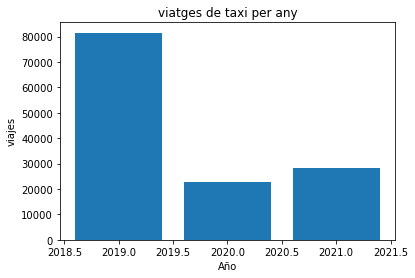

In [15]:
bar_plot(df, 'year', 'Año', 'viajes', 'viatges de taxi per any')


+ Visualitza ara en tres gràfiques, el nombre de viatges per mesos de cada any, fent servir la funció anterior.

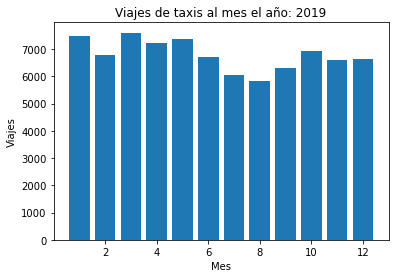

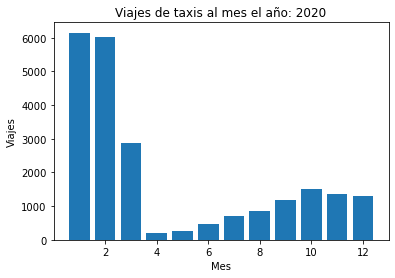

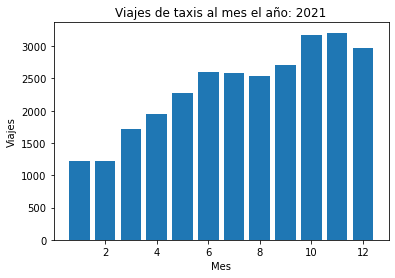

In [16]:
def plot_monthly(df, column, xlabel, ylabel, title):
    for year in YEARS:
        #Agrupem per anys i fem el plot per mesos d'aquell any.
        df_año = df[(df['year'] == year)]
        bar_plot(df_año, 'month', xlabel, ylabel, title + str(year))

plot_monthly(df, 'tpep_pickup_datetime', 'Mes', 'Viajes', 'Viajes de taxis al mes el año: ')

+ És el comportament que esperàveu? Per què?

> Resposta: Sí, ens imaginavem un comportament semblant a aquest degut al covid-19, que va paralitzar el moviment de la majoria de la gent, sobretot del turisme, que creiem que són els principals usuaris dels taxis

+ Visualitza **quants passatgers hi ha per taxi i per any**. Crea una figura **amb tres subfigures** (una per any) on es pugui veure el recompte de passatgers per any. Després repetiu el mateix gràfic visualitzant el % (utilitzeu el paràmetre *norm = True*).

In [49]:
def passengers_taxi_year(df, ylim, xlabel, ylabel, title, norm = False):
    """
    Funció que visualitza quants passatgers hi ha per taxi i per any.
    """

    # Crea una figura amb 3 subplots (un per a cada any) amb una mida específica.
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Itera a través dels anys definits en la constant 'YEARS'.
    for year in YEARS:
        if year == 2019:
            i = 0
        elif year == 2020:
            i = 1
        elif year == 2021:
            i = 2

        # Filtra el dataframe per l'any en curs.
        df_year = df[df['year'] == year]

        # Compta les aparicions úniques de cada valor de passatgers per l'any en curs.
        year_passatgers = df_year['passenger_count'].value_counts(normalize=norm)

        # Dibuixa un diagrama de barres per l'any en curs amb les dades de passatgers.
        axs[i].bar(year_passatgers.index, year_passatgers.values)

        axs[i].set_ylim(ylim)
        axs[i].set_xlabel(xlabel)
        axs[i].set_ylabel(ylabel)
        axs[i].set_title(title + " " + str(year))

    plt.tight_layout()

    # Mostra el gràfic.
    plt.show()

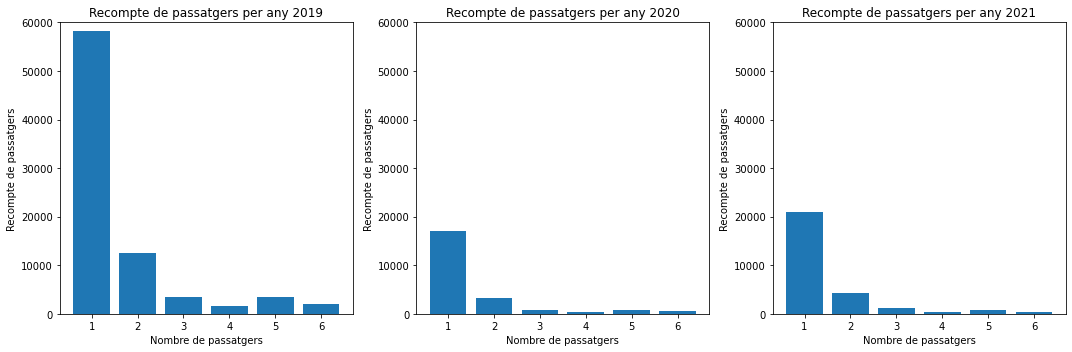

In [50]:
passengers_taxi_year(df,
                     (0, 60000),
                     'Nombre de passatgers',
                     'Recompte de passatgers',
                     'Recompte de passatgers per any')

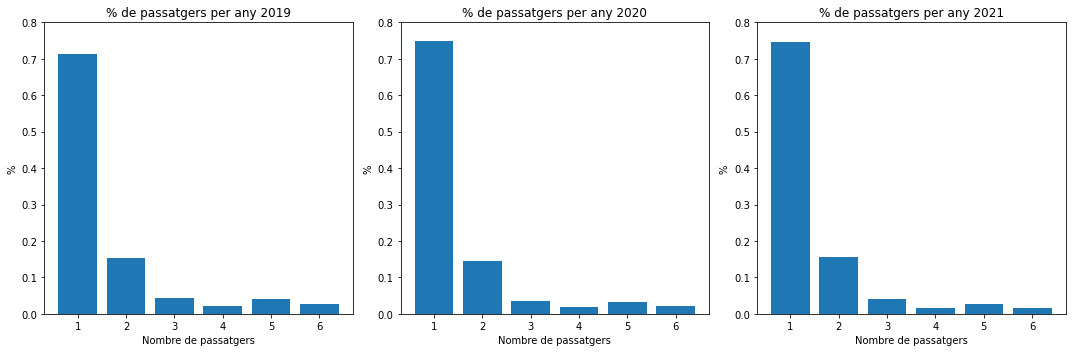

In [51]:
passengers_taxi_year(df,
                     (0, 0.8),
                     'Nombre de passatgers',
                     '%',
                     '% de passatgers per any',
                     norm = True)

+ Com descriurieu de forma **qualitativa** l'efecte de la covid sobre els taxis en base a l'anàlisi fet fins ara?

> Resposta: Observem una gran davallada en el nombre de passatgers, i per tant, viatges a partir de l'esclat de la covid. També podem veure que hi ha un petit augment en el percentatge de taxis sol·licitats individualment a partir del 2020. La nostra conclusió és que aquest comportament es deu a mesures de prevenció per evitar contagis.

+ Podeu calcular de forma **quantitativa** la magnitud dels canvis que heu detectat? Escriviu una funció que calculi una sèrie d'indicadors quantitatius (per exemple, quin canvi percentual hi ha en el nombre de viatges d'una sola persona, etc.).

In [21]:
def diff(df):

    # Separem les dades basades en l'any de recollida del taxi.
    df_2019 = df[df['tpep_pickup_datetime'].dt.year==2019]
    df_2020 = df[df['tpep_pickup_datetime'].dt.year==2020]
    df_2021 = df[df['tpep_pickup_datetime'].dt.year==2021]

    # Calculem el nombre total de viatges per cada any.
    trips_2019 = len(df_2019)
    trips_2020 = len(df_2020)
    trips_2021 = len(df_2021)

    # Calculem el percentatge de canvi en el nombre total de viatges entre anys.
    change_2019_2020 = ((trips_2020 -trips_2019) / trips_2019) * 100
    change_2020_2021 = ((trips_2021 -trips_2020) / trips_2020) * 100
    change_2019_2021 = ((trips_2021 -trips_2019) / trips_2019) * 100

    # Calculem la mitjana de passatgers per viatge per cada any.
    avg_passengers_2019 = df_2019['passenger_count'].mean()
    avg_passengers_2020 = df_2020['passenger_count'].mean()
    avg_passengers_2021 = df_2021['passenger_count'].mean()

    # Calculem el percentatge de canvi en la mitjana de passatgers entre anys.
    change_passengers_2019_2020 = ((avg_passengers_2020 - avg_passengers_2019) / avg_passengers_2019) * 100
    change_passengers_2020_2021 = ((avg_passengers_2021 - avg_passengers_2020) / avg_passengers_2020) * 100
    change_passengers_2019_2021 = ((avg_passengers_2021 - avg_passengers_2019) / avg_passengers_2019) * 100

    # Calculem el nombre total de passatgers per cada any.
    total_passengers_2019 = df_2019['passenger_count'].sum()
    total_passengers_2020 = df_2020['passenger_count'].sum()
    total_passengers_2021 = df_2021['passenger_count'].sum()

    # Calculem el percentatge de canvi en el nombre total de passatgers entre anys.
    change_total_passengers_2019_2020 = ((total_passengers_2020 - total_passengers_2019) / total_passengers_2019) * 100
    change_total_passengers_2020_2021 = ((total_passengers_2021 - total_passengers_2020) / total_passengers_2020) * 100
    change_total_passengers_2019_2021 = ((total_passengers_2021 - total_passengers_2019) / total_passengers_2019) * 100

    # Calculem el nombre de viatges amb un únic passatger per cada any.
    df_single_passenger_2019 = df_2019[(df_2019['passenger_count']==1.0)]
    single_passenger_2019 = len(df_single_passenger_2019)
    df_single_passenger_2020 = df_2020[(df_2020['passenger_count']==1.0)]
    single_passenger_2020 = len(df_single_passenger_2020)
    df_single_passenger_2021 = df_2021[(df_2021['passenger_count']==1.0)]
    single_passenger_2021 = len(df_single_passenger_2021)

    # Calculem el percentatge de viatges amb un únic passatger per cada any.
    single_passenger_percentage_2019 = (single_passenger_2019 * 100) /trips_2019
    single_passenger_percentage_2020 = (single_passenger_2020 * 100) /trips_2020
    single_passenger_percentage_2021 = (single_passenger_2021 * 100) /trips_2021

    # Mostra els resultats.


    print(f'Viatges al 2019: {trips_2019}')
    print(f'Viatges al 2020: {trips_2020}')
    print(f'Viatges al 2021: {trips_2021}\n')
    print(f'Diferencia de viatges entre el 2019 i el 2020: {change_2019_2020}%')
    print(f'Diferencia de viatges entre el 2020 i el 2021: {change_2020_2021}%')
    print(f'Diferencia de viatges entre el 2019 i el 2021: {change_2019_2021}%\n')
    print(f'Mitja de passatgers per viatge al 2019: {avg_passengers_2019}')
    print(f'Mitja de passatgers per viatge al 2020: {avg_passengers_2020}')
    print(f'Mitja de passatgers per viatge al 2021: {avg_passengers_2021}\n')
    print(f'Diferencia de mitja de passatgers entre el 2019 i el 2020: {change_passengers_2019_2020}%')
    print(f'Diferencia de mitja de passatgers entre el 2020 i el 2021: {change_passengers_2020_2021}%')
    print(f'Diferencia de mitja de passatgers entre el 2019 i el 2021: {change_passengers_2019_2021}%\n')
    print(f'Passatgers totals al 2019: {total_passengers_2019}')
    print(f'Passatgers totals al 2020: {total_passengers_2020}')
    print(f'Passatgers totals al 2021: {total_passengers_2021}\n')
    print(f'Diferencia total de passatgers entre el 2019 i el 2021: {change_total_passengers_2019_2020}%')
    print(f'Diferencia total de passatgers entre el 2019 i el 2021: {change_total_passengers_2020_2021}%')
    print(f'Diferencia total de passatgers entre el 2019 i el 2021: {change_total_passengers_2019_2021}%\n')
    print(f'Percentatge de viatges amb un sol passatger al 2019: {single_passenger_percentage_2019}%')
    print(f'Percentatge de viatges amb un sol passatger al 2020: {single_passenger_percentage_2020}%')
    print(f'PErcentatge de viatges amb un sol passatger al 2021: {single_passenger_percentage_2021}%')







+ Descriviu els resultats quantitatius que heu obtingut.

> Resposta: Podem veure que els viatges del 2020 respecte al 2019 van disminuir un 71%. També s'observa una petita recuperació al 2021 amb un augment del 23% respecte el 2020. En quant a la mitjana de passatger per viatge, observem que tant al 2020 com al 2021, la mitjana va disminuir. Ens ha sorprès aquesta dada, ja que esperàvem una petita recuperació al 2021, tot i que creiem que la del 2020 és major degut als primers mesos de l'any on no hi havia el virus.

In [22]:
diff(df)

Viatges al 2019: 81511
Viatges al 2020: 22869
Viatges al 2021: 28188

Diferencia de viatges entre el 2019 i el 2020: -71.94366404534357%
Diferencia de viatges entre el 2020 i el 2021: 23.258559622195985%
Diferencia de viatges entre el 2019 i el 2021: -65.4181644195262%

Mitja de passatgers per viatge al 2019: 1.5994651028695515
Mitja de passatgers per viatge al 2020: 1.50347632165814
Mitja de passatgers per viatge al 2021: 1.473996026678019

Diferencia de mitja de passatgers entre el 2019 i el 2020: -6.001305126270088%
Diferencia de mitja de passatgers entre el 2020 i el 2021: -1.9608087307692343%
Diferencia de mitja de passatgers entre el 2019 i el 2021: -7.844439742163317%

Passatgers totals al 2019: 130374.0
Passatgers totals al 2020: 34383.0
Passatgers totals al 2021: 41549.0

Diferencia total de passatgers entre el 2019 i el 2021: -73.62741037323393%
Diferencia total de passatgers entre el 2019 i el 2021: 20.841695023703576%
Diferencia total de passatgers entre el 2019 i el 2021: 

## 4. Quantitat de viatges

Fins ara hem vist la quantitat de viatges que hi ha hagut a nivell de mesos i anys.

Ara podem estudiar l'efecte de la covid en el nombre de trajectes si **agreguem** les dades per hores, dies de la setmana, setmanes de l'any, etc.

### Exercici D

+ Escriu una funció genèrica que visualitzi el nombre de trajectes per les agregacions de dades comentades i per cada any. Fes servir gràfics de línies discontínues (una línia per cada any) per veure'n l'evolució i marca amb una rodona o creu allà on està el valor.

In [23]:
def visualize_trips(df, columns, title, xlabel, ylabel):
    """
    Funció que visualitza els viatges segons diferents agregacions de dades.
    """

    # Extracció d'informació de la data/hora de recollida i entrega.
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour

    df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek
    df['dropoff_day'] = df['tpep_dropoff_datetime'].dt.dayofweek

    df['pickup_week'] = df['tpep_pickup_datetime'].dt.isocalendar().week
    df['dropoff_week'] = df['tpep_dropoff_datetime'].dt.isocalendar().week

    # Creació d'un gràfic amb dos subplots
    fig, axs = plt.subplots(2, 1, figsize=(14, 14))
    plt.figure(figsize=(12, 6))

    # Iteració pels anys i colors per visualitzar les dades.
    for year, color in zip(YEARS, ['b', 'y', 'r']):
        data_year = df[df['tpep_pickup_datetime'].dt.year == year]

        # Iteració per les columnes especificades per visualitzar.
        for columnes, i in zip(columns, range(len(columns))):
            count_travels = data_year[columnes].value_counts().sort_index()
            axs[i].plot(count_travels.index, count_travels.values, marker='o', linestyle='--', color=color, label=str(year))  # Assignació de l'etiqueta de l'any.

            axs[i].set_xlabel(xlabel)
            axs[i].set_ylabel(ylabel)
            axs[i].set_title(title + " " + str(columnes))
            axs[i].grid(True)

    # Mostrar la llegenda fora del bucle.
    for i in range(2):
        axs[i].legend()  # Afegir llegenda al gràfic.


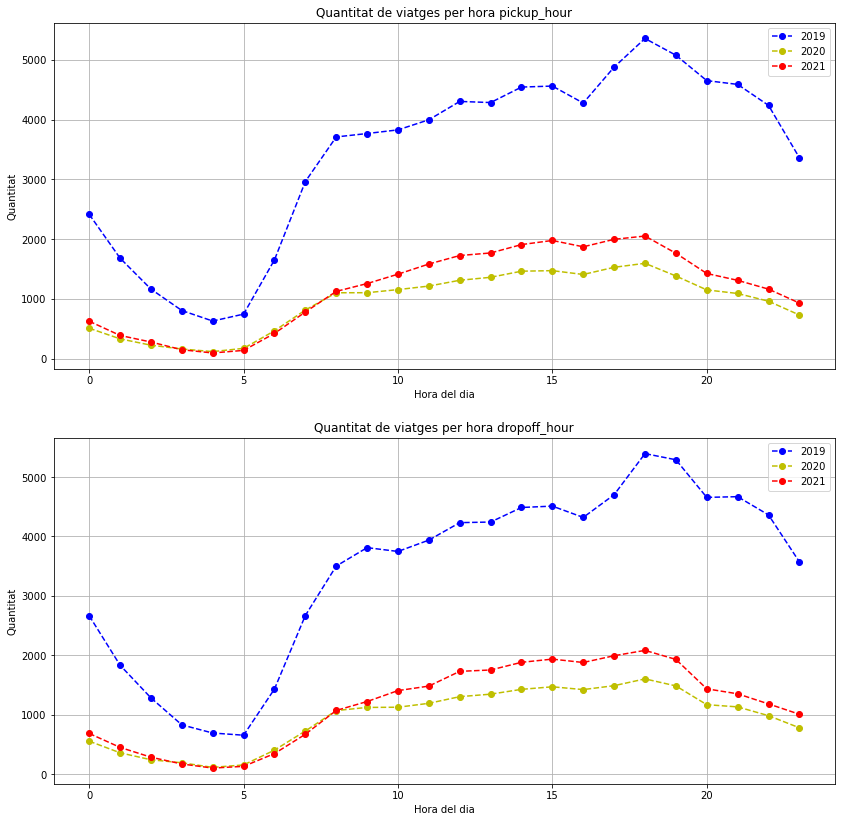

<Figure size 864x432 with 0 Axes>

In [24]:
visualize_trips(df,
                ['pickup_hour', 'dropoff_hour'],
                title = 'Quantitat de viatges per hora',
                xlabel = 'Hora del dia', ylabel = 'Quantitat')

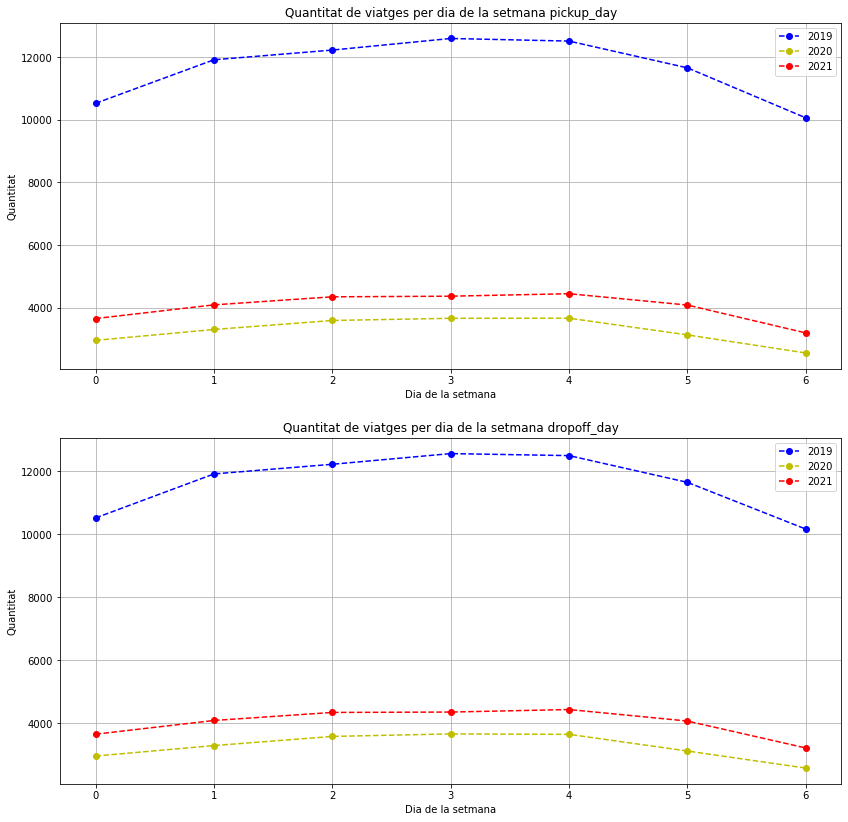

<Figure size 864x432 with 0 Axes>

In [25]:
visualize_trips(df,
                ['pickup_day', 'dropoff_day'],
                title = 'Quantitat de viatges per dia de la setmana',
                xlabel = 'Dia de la setmana',
                ylabel = 'Quantitat')

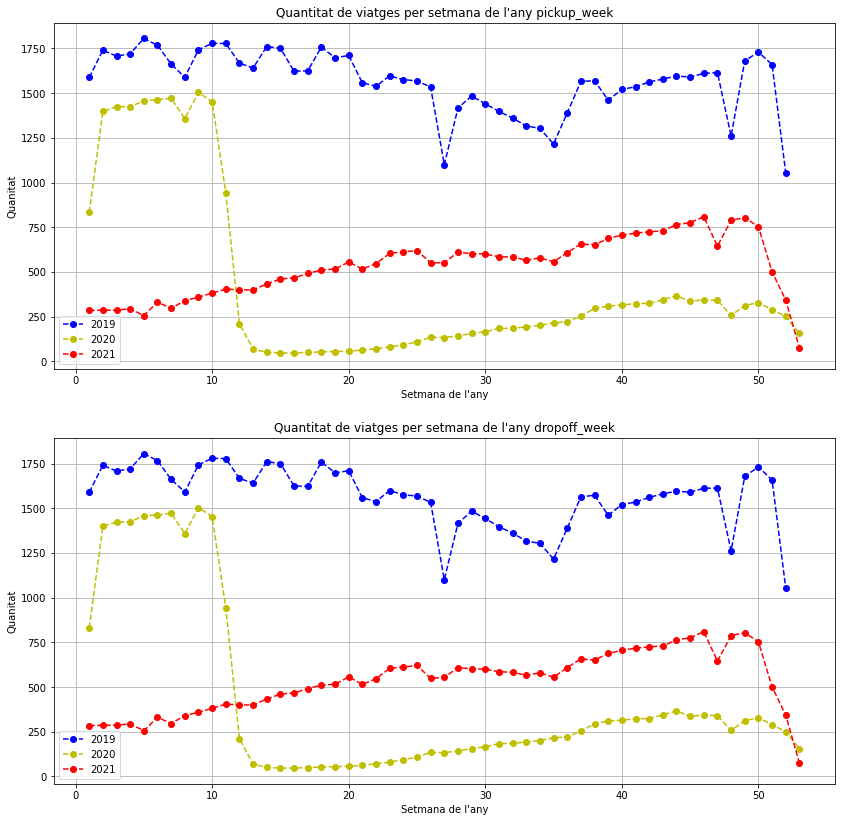

<Figure size 864x432 with 0 Axes>

In [26]:
visualize_trips(df,
                ['pickup_week', 'dropoff_week'],
                title = 'Quantitat de viatges per setmana de l\'any',
                xlabel = 'Setmana de l\'any',
                ylabel = 'Quanitat')

+ Com descriurieu l'efecte de la covid en cada cas (si és que en té)? Quin creieu que és el motiu?

> Resposta: A la gràfica de taxis agafats segons el dia de la setmana, observem que la proporció es manté, però no així el nombre de viatges. També podem veure clarament a quina setmana de l'any va aparèixer la covid a Nova York, ja que hi ha una gran baixada en el nombre de taxis demanats.

## 5. Relació distancia, temps i velocitat

A les dades tenim la **distància** que ha recorregut el taxi en cada viatge i de la informació temporal podem extreure també la **durada** d'aquest.

Ara explorarem com la covid va afectar les distàncies i les durades dels viatges, i també la velocitat dels taxis. També ens preguntarem si la densitat de trànsit va variar.

### Exercici E

+ Per començar, escriu una funció que visualitzi els **histogrames** de distància i durada per any.

In [27]:
def visualize_histograms(df, column, title, xlabel, ylabel, xlim):
    """
    Funció que crea un histograma a partir de la informació que conté la columna del dataframe
    """
    # Adaptem els noms a la crida donada
    df['trip_distance'] = df['trip_distance_with_km']
    df['trip_duration'] = df['time_traveling_hours']
    df['speed'] = df['traveling_speed']
    
    # Creem els subplots
    plt.figure(figsize=(14, 6))
    # Iterem per any i color
    for year,color in zip(YEARS,['black','red','white']):
        year_data = df[df['year'] == year]
        hist_data = year_data[column]
        plt.hist(hist_data,bins=50,alpha=0.6,range=xlim,color=color,label=year)


    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim(xlim)
    plt.legend()

    # Mostrar el histograma
    plt.show()



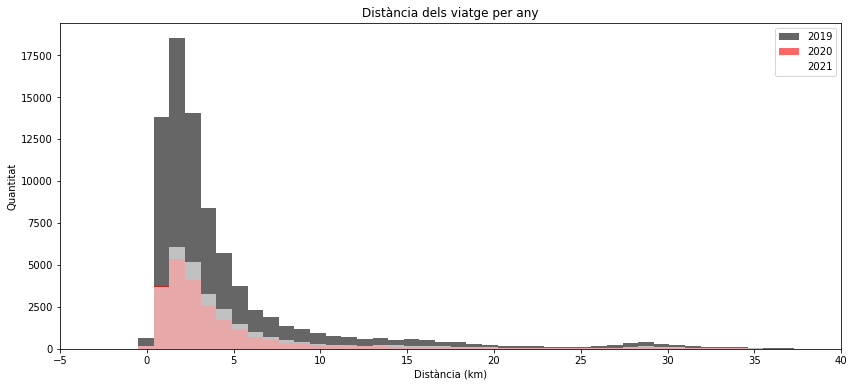

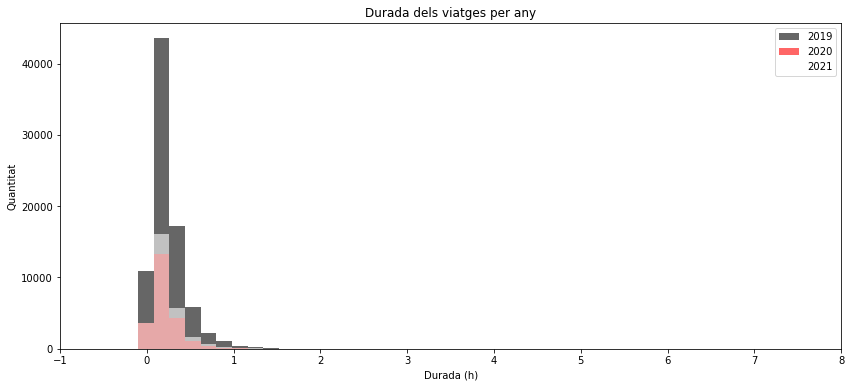

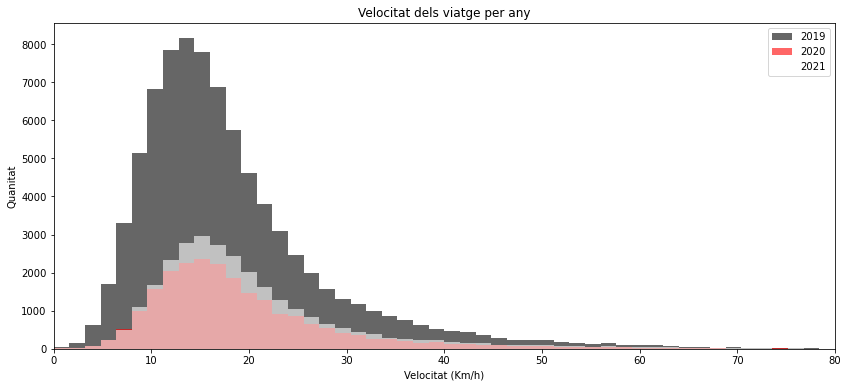

In [28]:
visualize_histograms(df, 'trip_distance', title = 'Distància dels viatge per any',
                     xlabel = 'Distància (km)', ylabel = 'Quantitat', xlim = (-5, 40))

visualize_histograms(df, 'trip_duration', title = 'Durada dels viatges per any',
                     xlabel = 'Durada (h)', ylabel = 'Quantitat', xlim = (-1, 8) )

visualize_histograms(df, 'speed', title = 'Velocitat dels viatge per any',
                     xlabel = 'Velocitat (Km/h)', ylabel = 'Quanitat', xlim = (0, 80) )

* Com creieu que la covid va afectar les distàncies i durades dels viatges?

> Resposta: Creiem que tant la distància com la durada no va ser una cosa que és veigués afectada per la covid, podem veure que hi ha menys quantitat de viatges després del covid, però ens sembla que la proporció es manté proporcional a l'any abans de la Covid.

* I a la velocitat dels taxis?

> Resposta: La velocitat és una dada que va lligada a la distancia i la durada del viatge, al no haver estat afectats aquests dos, tampoc veiem un efecte per la Covid en la velocitat a la que és movien els taxis.

## 6. Visualització de les localitzacions dels viatges

In [29]:
column_names = df.columns.tolist()
print(column_names)

['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'total_amount', 'time_traveling_hours', 'year', 'month', 'trip_distance_with_km', 'traveling_speed', 'pickup_hour', 'dropoff_hour', 'pickup_day', 'dropoff_day', 'pickup_week', 'dropoff_week', 'trip_duration', 'speed']


Només tenim la ID d'una localització, per tant, necessitem aconseguir la latitud i la longitud.

La mateixa pàgina dels taxis ens dóna el fitxer *taxi_zones.zip*, però primer cal que convertim les dades de coordenades amb format WGS84.

Podem utilitzar aquesta web: https://mygeodata.cloud/

In [30]:
from utils import get_lat_lon, draw_region_map, draw_zone_map

In [31]:
sf = shapefile.Reader('taxi_zones.shp')

fields_name = [field[0] for field in sf.fields[1:]]
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))
attributes = sf.records()
shp_attr = [dict(zip(fields_name, attr)) for attr in attributes]

In [32]:
df_loc = pd.DataFrame(shp_attr).join(get_lat_lon(sf, shp_dic).set_index("LocationID"), on="LocationID")
df_loc.tail()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,longitude,latitude
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,-73.856334,40.899061
259,260,0.133514,0.000422,Woodside,260,Queens,-73.906851,40.746603
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,-74.012643,40.709120
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,-73.945142,40.776681
262,263,0.037017,0.000066,Yorkville West,263,Manhattan,-73.951008,40.778766


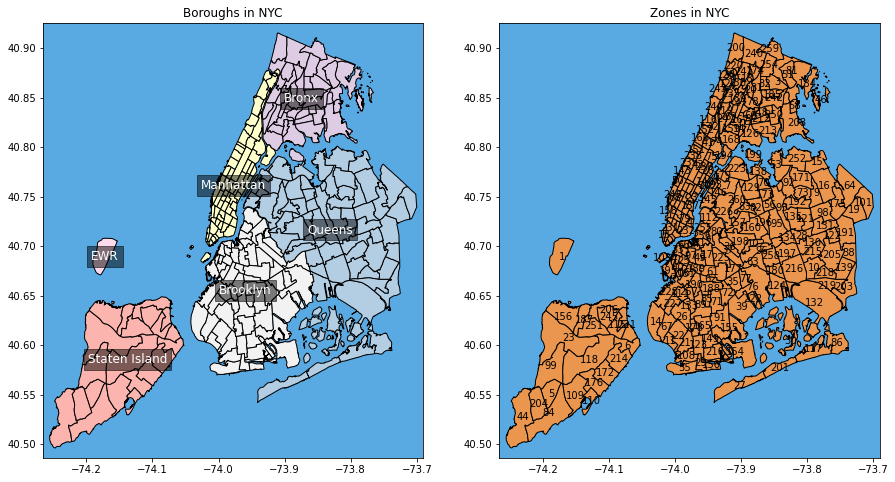

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax = plt.subplot(1, 2, 1)
ax.set_title("Boroughs in NYC")
draw_region_map(ax, sf, shp_dic)
ax = plt.subplot(1, 2, 2)
ax.set_title("Zones in NYC")
draw_zone_map(ax, sf, shp_dic)

### Exercici F

+ Ara teniu dos dataframe que necessitem unir. Utilitza la funció *merge* de Pandas per crear un nou dataframe (conserva el dataframe `df`), anomenat `merge`, que contingui la longitud i latitud (del punt de recollida i del punt de destí) a cada fila.

In [34]:
import pandas as pd



df_loc = df_loc[['LocationID', 'latitude', 'longitude','zone']]

# Fusió basada en PULocationID
merge = pd.merge(df, df_loc, left_on='PULocationID', right_on='LocationID', how='left')
merge.rename(columns={'latitud': 'pickup_latitude', 'longitud': 'pickup_longitude'}, inplace=True)
merge.drop('LocationID', axis=1, inplace=True)

# Fusió basada en DOLocationID
merge = pd.merge(merge, df_loc, left_on='DOLocationID', right_on='LocationID', how='left')
merge.rename(columns={'latitud': 'dropoff_latitude', 'longitud': 'dropoff_longitude'}, inplace=True)
merge.drop('LocationID', axis=1, inplace=True)

# Reanomenem les columnes
merge = merge.rename(columns={
    'latitude_x': 'pickup_latitude',
    'longitude_x': 'pickup_longitude',
    'latitude_y': 'dropoff_latitude',
    'longitude_y': 'dropoff_longitude',
    'zone_x':'zone_pickup',
    'zone_y':'zone_dropoff'
})


In [35]:
merge.shape

(132754, 28)

In [36]:
merge.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,time_traveling_hours,...,pickup_week,dropoff_week,trip_duration,speed,pickup_latitude,pickup_longitude,zone_pickup,dropoff_latitude,dropoff_longitude,zone_dropoff
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,2.414010,151,239,1,7.0,9.95,0.111111,...,1,1,0.111111,21.726090,40.797859,-73.968222,Manhattan Valley,40.784025,-73.978732,Upper West Side South
1,2019-01-01 00:53:09,2019-01-01 01:01:16,1.0,3.073839,148,137,2,8.5,9.80,0.135278,...,1,1,0.135278,22.722427,40.719102,-73.990664,Lower East Side,40.740336,-73.977172,Kips Bay
2,2019-01-01 00:50:22,2019-01-01 01:19:44,2.0,12.391918,264,264,1,26.0,31.30,0.489444,...,1,1,0.489444,25.318334,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01 00:54:46,2019-01-01 01:03:13,1.0,2.253076,249,164,1,7.5,11.40,0.140833,...,1,1,0.140833,15.998173,40.734611,-74.001965,West Village,40.749083,-73.985684,Midtown South
4,2019-01-01 00:09:29,2019-01-01 00:12:29,2.0,1.078258,162,137,2,4.0,5.30,0.050000,...,1,1,0.050000,21.565156,40.756840,-73.972471,Midtown East,40.740336,-73.977172,Kips Bay


In [37]:
merge = merge.dropna()

In [38]:
merge.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,time_traveling_hours,...,pickup_week,dropoff_week,trip_duration,speed,pickup_latitude,pickup_longitude,zone_pickup,dropoff_latitude,dropoff_longitude,zone_dropoff
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,2.414010,151,239,1,7.0,9.95,0.111111,...,1,1,0.111111,21.726090,40.797859,-73.968222,Manhattan Valley,40.784025,-73.978732,Upper West Side South
1,2019-01-01 00:53:09,2019-01-01 01:01:16,1.0,3.073839,148,137,2,8.5,9.80,0.135278,...,1,1,0.135278,22.722427,40.719102,-73.990664,Lower East Side,40.740336,-73.977172,Kips Bay
3,2019-01-01 00:54:46,2019-01-01 01:03:13,1.0,2.253076,249,164,1,7.5,11.40,0.140833,...,1,1,0.140833,15.998173,40.734611,-74.001965,West Village,40.749083,-73.985684,Midtown South
4,2019-01-01 00:09:29,2019-01-01 00:12:29,2.0,1.078258,162,137,2,4.0,5.30,0.050000,...,1,1,0.050000,21.565156,40.756840,-73.972471,Midtown East,40.740336,-73.977172,Kips Bay
5,2019-01-01 00:29:00,2019-01-01 00:46:19,1.0,4.361311,161,262,1,13.5,17.76,0.288611,...,1,1,0.288611,15.111377,40.758030,-73.977680,Midtown Center,40.776681,-73.945142,Yorkville East


## 7. Quines zones de NY tenen més recollides i quines zones tenen més arribades?

En aquest apartat volem conèixer i visualitzar les zones on els taxis són més utilitzats.

El primer pas és ordenar i guardar en una variable els llocs més comuns en la recollida i el destí.

### Exercici G
+  Escriu una funció `show_top_n` que imprimeix els 5 llocs més freqüents de recollida i els 5 llocs més freqüents d'arribada, per cada any.

In [39]:
#  Creem un dataframe auxiliar que conté informàcio de quants viatges per id s'han fet
top_pu = merge.groupby(['year', 'PULocationID']).size().reset_index(name='count')
top_do = merge.groupby(['year', 'DOLocationID']).size().reset_index(name='count')




In [40]:
n_top = 5
def show_top_n(df, column, df_loc, n_top = n_top):
    """
    Funció que mostra els llocs més usuals per any
    """
    for year in df['year'].unique():
        print(f"\nAny: {year}")
        # Seleccionem els 5 més visitats
        top_for_year = df[df['year'] == year].nlargest(n_top, 'count')

        merged_df = pd.merge(top_for_year, df_loc, left_on=column, right_on='LocationID', how='left')

        print(f"\nTop {n_top} zones basat en {column}:")
        print(merged_df[[column, 'zone', 'count']].to_string(index=False))



In [41]:
show_top_n(top_pu, 'PULocationID', df_loc)


Any: 2019

Top 5 zones basat en PULocationID:
 PULocationID                         zone  count
          237        Upper East Side South   3494
          161               Midtown Center   3391
          236        Upper East Side North   3206
          162                 Midtown East   2978
          186 Penn Station/Madison Sq West   2972

Any: 2020

Top 5 zones basat en PULocationID:
 PULocationID                         zone  count
          237        Upper East Side South   1097
          236        Upper East Side North   1076
          161               Midtown Center    924
          162                 Midtown East    798
          186 Penn Station/Madison Sq West    777

Any: 2021

Top 5 zones basat en PULocationID:
 PULocationID                         zone  count
          237        Upper East Side South   1496
          236        Upper East Side North   1299
          161               Midtown Center   1036
          132                  JFK Airport    975
         

In [42]:

show_top_n(top_do, 'DOLocationID', df_loc)


Any: 2019

Top 5 zones basat en DOLocationID:
 DOLocationID                  zone  count
          236 Upper East Side North   3396
          161        Midtown Center   3290
          237 Upper East Side South   3253
          170           Murray Hill   2531
          162          Midtown East   2504

Any: 2020

Top 5 zones basat en DOLocationID:
 DOLocationID                  zone  count
          236 Upper East Side North   1063
          237 Upper East Side South    949
          161        Midtown Center    801
          141       Lenox Hill West    694
          170           Murray Hill    673

Any: 2021

Top 5 zones basat en DOLocationID:
 DOLocationID                  zone  count
          236 Upper East Side North   1303
          237 Upper East Side South   1249
          161        Midtown Center    969
          170           Murray Hill    872
          239 Upper West Side South    842


Visualitzem amb un mapa de calor quines són les zones més recurrents.

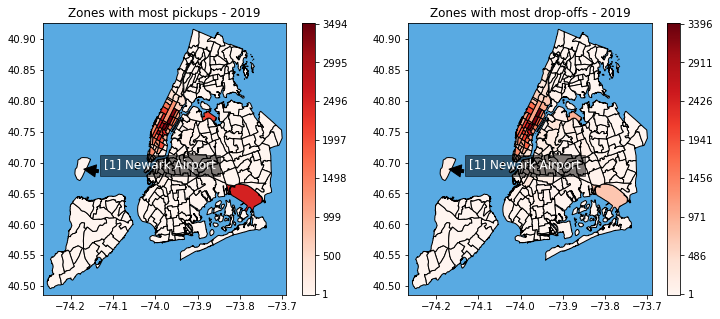

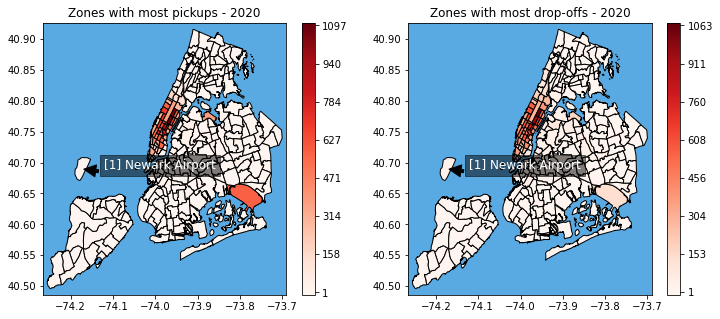

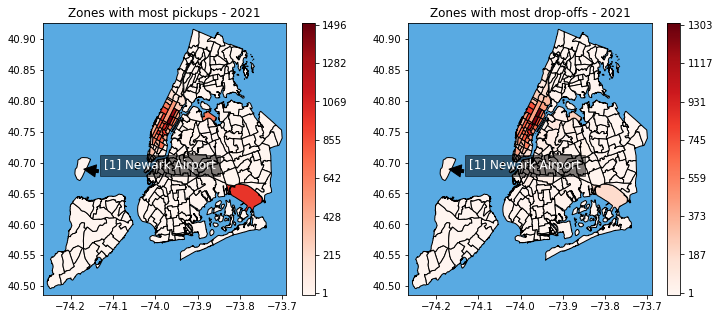

In [43]:
for year in YEARS:

    PUcount = {k:v for k, v in top_pu[top_pu.year == year][['PULocationID', 'count']].values}
    DOcount = {k:v for k, v in top_do[top_do.year == year][['DOLocationID', 'count']].values}
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    ax = plt.subplot(1, 2, 1)
    ax.set_title(f"Zones with most pickups - {year}")
    draw_zone_map(ax, sf, shp_dic, heat=PUcount, text=list(PUcount.keys())[:1])
    ax = plt.subplot(1, 2, 2)
    ax.set_title(f"Zones with most drop-offs - {year}")
    draw_zone_map(ax, sf, shp_dic, heat=DOcount, text=list(DOcount.keys())[:1])

+ Per què creieu que la zona de Manhattan té més quantitat de viatges?

> Resposta: Creiem que és la zona que té més quantitat de viatges ja que és la zona més densa i per tant en una zona més petita es concentren més viatges. També és la zona on hi han més infrastructures i atraccions turístiques.

## 8. Hospitals

Com ha canviat la destinació dels viatges? Hi ha més viatges a les zones on hi ha grans hospitals?

A la següent cel·la us donem la creació manual d'un DataFrame amb la localització més important dels hospitals de Nova York.

In [44]:
hospitals = [('New York’s Presbyterian Lower Manhattan Hospital, NYC, NY, USA', '40.710255', '-74.005058'),
('Manhattan Gastroenterology, NYC, NY, USA', '40.778259', '-73.958092'),
('Stem Cell Therapy Hospital, NYC, NY, USA', '40.601517', '-73.961067'),
('Park Avenue Smiles, Yonkers, NYC, NY, USA', '40.945873', '-73.890671'),
('Cosmetic Dentistry Center, NYC, NY, USA', '40.629234', '-74.026077'),
('Envy Smile Dental Spa, Brooklyn, NYC, NY, USA', '40.607059', '-73.960144'),
('VIVA EVE, Forest Hills, NYC, NY, USA', '40.734291', '-73.849434'),
('Forest Hills Medical Services, Queens, NYC, NY, USA', '40.734310', '-73.849510'),
('Professional Gynecological Services, Brooklyn, NY, NY, USA', '40.689747', '-73.982346'),
('Manhattan Womens Health & Wellness, New York, NY, USA', '40.741997', '-73.986107'),
('Brooklyn Abortion Clinic, Brooklyn, NY, New York, USA', '40.689743', '-73.982368'),
('Brooklyn GYN Place, Brooklyn, NY, USA', '40.692696', '-73.993584'),
('Americas Holistic Doctor, NYC, NY, USA', '40.742531', '-73.985489'),
('NJS Physical Medicine & Rehabilitation, Brooklyn, NY, USA', '40.641621', '-73.956734'),
('DHD Medical, Brooklyn New York, USA', '40.625568', '-73.918320'),
('Workers Compensation Doctor, New York, NY, USA', '40.652225', '-74.006104'),]

hospitals = pd.DataFrame(hospitals, columns = ['Place Name', 'Latitude', 'Longitude'])
hospitals['Latitude'] = hospitals['Latitude'].astype(float)
hospitals['Longitude'] = hospitals['Longitude'].astype(float)
hospitals.head()

,Place Name,Latitude,Longitude
0,New York’s Presbyterian Lower Manhattan Hospit...,40.710255,-74.005058
1,"Manhattan Gastroenterology, NYC, NY, USA",40.778259,-73.958092
2,"Stem Cell Therapy Hospital, NYC, NY, USA",40.601517,-73.961067
3,"Park Avenue Smiles, Yonkers, NYC, NY, USA",40.945873,-73.890671
4,"Cosmetic Dentistry Center, NYC, NY, USA",40.629234,-74.026077


### Exercici H

+ Utilitza la latitud i longitud de cada hospital i la de les zones del dataframe *merge* per veure la relació entre la distribució dels hospitals i la dels viatges. Per fer-ho utilitza els gràfics de dispersió. Recorda que s'entendrà millor si els punts són transparents (paràmetre *alpha*).

+ Després repeteix el mateix gràfic però separat per any.

In [45]:
def scatter_locations(merge, hospitals):
    # Afegir els punts de les destinacions de taxis
    plt.scatter(merge['dropoff_latitude'], merge['dropoff_longitude'], color='red',  alpha=0.08, label='Destinacions de Taxis')

    # Crear el gràfic de dispersió per als hospitals
    plt.scatter(hospitals['Latitude'], hospitals['Longitude'], color='blue', label='Hospitals')

    # Afegir etiquetes i títol
    plt.xlabel('Latitud')
    plt.ylabel('Longitud')
    plt.title('Distribució d’Hospitals i Destinacions de Taxis')

    # Afegir llegenda
    plt.legend()

    # Mostrar el gràfic
    plt.show()


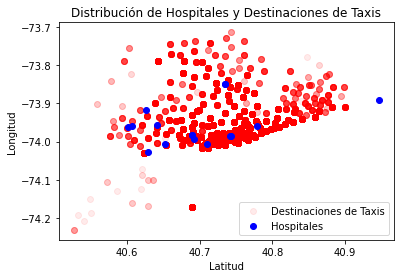

In [46]:
scatter_locations(merge, hospitals)

In [52]:
def scatter_locations_per_year(merge, hospitals):
    """Funció que mostra la distribució dels hospitals i les destinacions dels taxis"""
    for year in YEARS:
        
      merge2 = merge[merge['year'] == year]
      scatter_locations(merge2, hospitals)


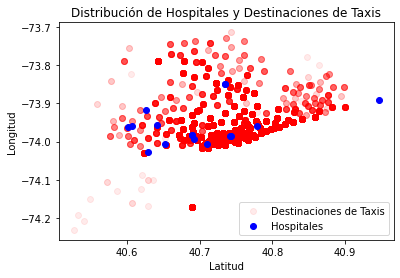

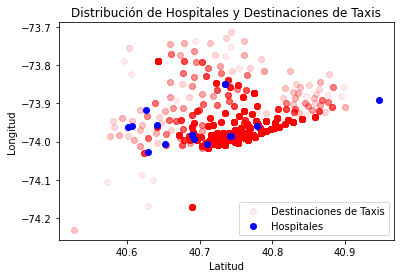

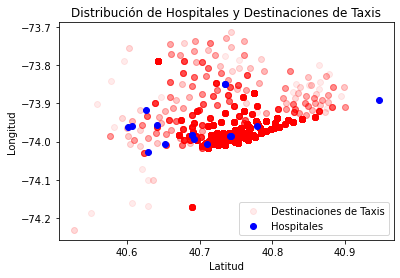

In [53]:
scatter_locations_per_year(merge, hospitals)

* Veus algun comportament interessant per comentar?
> Resposta: Veiem que l'any de l'esclat de la covid i el posterior tenen menys viatges degut a que veiem més punts vermells difuminats degut a la gamma. També podem observar que la zona central on hi ha més concentració de viatges de taxi també coincideix amb la zona on trobem més hospitals, trobant-ne fins a 5 en aquesta zona de concentració de taxis. Creiem que pot estar relacionat ja que molta gent a les ciutats prioritza utilitzar el transport públic per sobre de tenir el seu propi mitjà de transport com pot ser un cotxe. Això crceiem que pot fer que en cas de tenir una urgència, molta gent agafi un taxi per tal d'arribar al hospital més ràpid.